# Tema 3: Programación Dinámica
En este notebook podremos en práctica los conceptos relacionados con el tema 3. Asegúrate de tener la lección a la mano si requieres de alguna información adicional.

## Introducción
En esta sección veremos los códigos descritos en la implementación de la secuencia de Fibonacci

In [1]:
# Cargamos los paquetes que vamos a usar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
%matplotlib inline

In [2]:
def tictoc(func, printing=True):
    """
    Esta función la usamos para medir el tiempo de otras funciones
    :param func: Función a medir
    :param printing: bool, Opción para imprimir o no el valor medido de tiempo. Default: True
    :return:
    """
    def wrap_func(*args, **kwargs):
        start_time = time()
        out = func(*args, **kwargs)
        end_time = time()
        if printing:
            print(f"El método {func.__name__!r}, para {args[0]} se ejecutó en " +
                  f"{(end_time - start_time):.4e} s")
        return out, end_time - start_time
    return wrap_func

### Implementaciones simples
En esta parte solamente definimos e implementamos cada método una sola vez.

Implementación recursiva (clásica) de la secuencia de Fibonacci

In [3]:
def fib_rec(n):
    """
    Definición recursiva de la secuencia de Fibonacci.

    :param n: Índice a calcular en la secuencia.
    :return: Valor calculado.
    """
    if n <= 1:
        return n
    else:
        return fib_rec(n - 1) + fib_rec(n - 2)

Usemos el método recursivo para los 20 primeros números

In [4]:
for n in range(20):
    print(fib_rec(n), end=', ')

# 0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181,

0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 

In [5]:
# Descomenta esta implementación para ver cuánto se tarda en calcular el número 40 de la secuencia
# fib_rec(40)

Implementación memoizada y recursiva de la secuencia de Fibonacci; utilizando programación dinámica

In [6]:
memo_rec = [-1] * 100
def fib_dp_rec(n):
    """
    Definición memoizada y recursiva de la secuencia de Fibonacci; utilizando programación dinámica.
    :param n: Índice a calcular en la secuencia.
    :return: Valor calculado.
    """
    if n <= 0:
        return n
    else:
        if memo_rec[n] == -1:
            memo_rec[n] = fib_dp_rec(n - 1) + fib_dp_rec(n - 2)
        return memo_rec[n]

Implementación memoizada e iterativa de la secuencia de Fibonacci; utilizando programación dinámica

In [7]:
memo_ite = [-1] * 100
def fib_dp_ite(n):
    """
    Definición memoizada e iterativa de la secuencia de Fibonacci; utilizando programación dinámica.
    :param n: Índice a calcular en la secuencia.
    :return: Valor calculado.
    """
    memo_ite[0] = 0
    memo_ite[1] = 1

    for i in range(2, n + 1):
        memo_ite[i] = memo_ite[i - 1] + memo_ite[i - 2]

    return memo_ite[n]

Usemos los tres métodos para ver cuánto tiempo les toma calcular el valor 30 de la secuencia.

In [8]:
# Método 1: Recursivo clásico
_ = tictoc(fib_rec)(30)

# Método 2: Recursivo memoizado (programación dinámica)
memo_rec = [-1] * 31
_ = tictoc(fib_dp_rec)(30)

# Método 3: Iterativo memoizado (programación dinámica)
memo_ite = [-1] * 31
_ = tictoc(fib_dp_ite)(30)

El método 'fib_rec', para 30 se ejecutó en 7.7615e-01 s
El método 'fib_dp_rec', para 30 se ejecutó en 3.8862e-05 s
El método 'fib_dp_ite', para 30 se ejecutó en 1.4544e-05 s


### Verificación estadística
Como la prueba anterior puede ser muy variable debido a la carga de la máquina en la que la corramos, vamos a hacer varias implementaciones para estimar la tendencia y así sacar conclusiones con fundamento estadístico.

In [9]:
# En este ciclo de 30 repeticiones solamente aplicamos cada uno de los métodos y guardamos los tiempos resultantes en un diccionario
datos_completos = []
n_max = 30
for n in range(n_max):
    memo_rec = [-1] * n_max
    memo_ite = [-1] * n_max
    for rep in range(30):
        tiempos = {
            'n': n,
            'rep': rep,
        }
        _, tiempos['Rec'] = tictoc(fib_rec, False)(n)

        _, tiempos['DP Rec'] = tictoc(fib_dp_rec, False)(n)

        _, tiempos['DP Ite'] = tictoc(fib_dp_ite, False)(n)

        datos_completos.append(tiempos)

Ahora solamente visualizamos los datos del diccionario (o archivo JSON, bastante común en el contexto de Data Science). Para eso convertimos el conjunto de datos en un DataFrame de Pandas

In [39]:
df = pd.DataFrame(datos_completos)
df.describe()

,n,rep,Rec,DP Rec,DP Ite
count,900.000000,900.000000,9.000000e+02,9.000000e+02,9.000000e+02
mean,14.500000,14.500000,2.684822e-02,2.479288e-06,1.811213e-05
std,8.660254,8.660254,5.505169e-02,3.769610e-06,2.285734e-04
min,0.000000,0.000000,2.384186e-07,2.384186e-07,4.768372e-07
25%,7.000000,7.000000,8.821487e-06,7.152557e-07,2.861023e-06
50%,14.500000,14.500000,2.795458e-04,1.192093e-06,5.722046e-06
75%,22.000000,22.000000,1.924962e-02,3.576279e-06,1.358986e-05
max,29.000000,29.000000,3.138220e-01,3.480911e-05,6.412745e-03


Visualizamos el valor promedio de tiempo para cada valor de `n` probado. Como puedes notar, es evidente que la programación dinámica consume menos tiempo (y recursos).

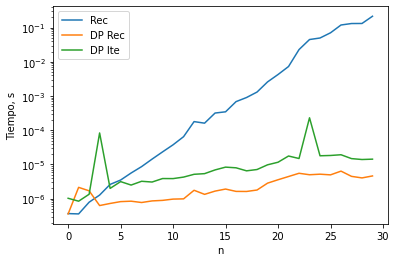

In [12]:
ax = df.groupby(by='n', as_index=False)[['Rec', 'DP Rec', 'DP Ite']].\
    mean().plot(x='n')
ax.set_ylabel('Tiempo, s')
ax.set_yscale('log')

## Procesos de Decisión de Márkov
En esta sección implementamos los conceptos vistos antes en el contexto del aprendizaje por refuerzo. Esta vez utilizamos el ejemplo descrito en el tema.

Definimos las variables

In [13]:
LADO_CUADRO = 5
CELDAS_SALIDA = [(2, 4)]
FONTSIZE = 18
COLORMAP = plt.cm.rainbow

Definimos la función para mostrar el entorno de acuerdo a los valores actuales

In [14]:
def mostrar_entorno(valor, accion=None, titulo1=None, titulo2=None):
    dimensiones = (LADO_CUADRO, LADO_CUADRO)

    # Leemos los valores v_pi
    valor = valor.reshape(*dimensiones)

    # Leemos las direcciones o acciones disponibles
    if accion is None:
        derecha = np.ones(dimensiones)
        arriba = np.ones(dimensiones)
        izquierda = -1 * derecha
        abajo = -1 * arriba
    else:
        arriba = accion[:, 0].reshape(dimensiones)
        abajo = -1 * accion[:, 1].reshape(dimensiones)
        derecha = accion[:, 2].reshape(dimensiones)
        izquierda = -1 * accion[:, 3].reshape(dimensiones)

    # Reservamos el lugar de salida
    for ind_x, ind_y in CELDAS_SALIDA:
        derecha[ind_y, ind_x] = 0
        arriba[ind_y, ind_x] = 0
        abajo[ind_y, ind_x] = 0
        izquierda[ind_y,ind_x] = 0

    # Generamos la grid con la información de los valores como colores
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
    zeros = np.zeros(dimensiones)
    ax1.matshow(valor, cmap=COLORMAP)
    ax2.matshow(valor, cmap=COLORMAP)

    # Asignar una 'X' a las celdas que son metas y el valor para las que no.
    for i in range(LADO_CUADRO):
        for j in range(LADO_CUADRO):
            ax1.text(i, j, 'Mictlán' if (i, j) in CELDAS_SALIDA
            else f"{round(valor[j, i], 1)}", va='center', ha='center',
                     fontsize=FONTSIZE, color="black")

    # Asigmanos las flechas que indicarán las posibles acciones
    ax2.quiver(izquierda, zeros, scale=15)
    ax2.quiver(derecha, zeros, scale=15)
    ax2.quiver(zeros, arriba, scale=15)
    ax2.quiver(zeros, abajo, scale=15)

    # Establecemos parámetros de visualización adicionales
    ax1.set_title("Valor, $v_k$" if titulo1 is None else titulo1,
                  fontsize=FONTSIZE)
    ax2.set_title("Política, $\\pi$" if titulo2 is None else titulo2,
                  fontsize=FONTSIZE)
    ax1.axis(False)
    ax2.axis(False)
    plt.show()

Utilizamos la función para mostrar el entorno o problema inicial

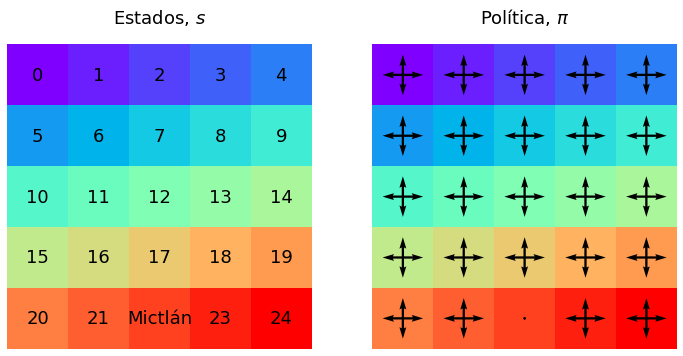

In [15]:
estados = np.arange(LADO_CUADRO ** 2)
mostrar_entorno(estados, titulo1="Estados, $s$")

Definimos la función para inicializar el entorno

In [16]:
def inicializar_entorno(lado_cuadro, celdas_salida):
    # Aquí definimos las probabilidades de transición iniciales, es decir, todas 0
    prob_transiciones = np.zeros((lado_cuadro ** 2, 4, lado_cuadro ** 2))

    # Luego hacemos lo mismo con las recompensas, en este caso, todas igual a -1
    recompensas = -1 * np.ones((lado_cuadro ** 2, 4, lado_cuadro ** 2))

    # Las acciones son las siguientes:
    #   0: arriba, 1: abajo, 2: derecha, 3: izquierda
    for estado in range(lado_cuadro ** 2):
        # Para cuando se puede mover arriba
        if estado < lado_cuadro:
            prob_transiciones[estado, 0, estado] = 1
        else:
            prob_transiciones[estado, 0, estado - lado_cuadro] = 1

        # Para cuando se puede mover abajo
        if estado < lado_cuadro * (lado_cuadro - 1):
            prob_transiciones[estado, 1, estado + lado_cuadro] = 1
        else:
            prob_transiciones[estado, 1, estado] = 1

        # Para cuando se puede mover a la derecha
        if (estado + 1) % lado_cuadro == 0:
            prob_transiciones[estado, 2, estado] = 1
        else:
            prob_transiciones[estado, 2, estado + 1] = 1

        # Para cuando se puede mover a la izquierda
        if estado % LADO_CUADRO == 0:
            prob_transiciones[estado, 3, estado] = 1
        else:
            prob_transiciones[estado, 3, estado - 1] = 1

    # Definimos los estados terminales
    estados = np.arange(lado_cuadro ** 2).reshape((lado_cuadro, lado_cuadro))
    for ind_x, ind_y in celdas_salida:
        estado = estados[ind_y, ind_x]
        prob_transiciones[estado, :,:] = 0
        recompensas[estado,:,:] = 0

    return prob_transiciones, recompensas

Definimos la función para evaluar la política iterativamente

In [17]:
def evaluar_pi(politica, gamma=1, num_iteraciones=100, valor=None):
    # Lee los valores, si no son ingresados, se definen como cero
    valor = np.zeros(LADO_CUADRO ** 2) if valor is None else valor

    # Proceso iterativo, para el número de iteraciones
    for _ in range(num_iteraciones):
        # Copiamos el arreglo de los valores
        valor_prev = valor.copy()

        # Ahora recorremos los estados y actualizamos los valores
        # Recuerda la ecuación de Bellman iterativa
        for s in range(LADO_CUADRO ** 2):
            valor[s] = np.sum(
                [politica[s, a] * np.sum(
                    [prob_transiciones[s][a][sp] *
                     (recompensas[s][a][sp] + gamma * valor_prev[sp]
                      ) for sp in range(LADO_CUADRO ** 2)]
                ) for a in range(4)])
    return valor

Ahora, utilicemos lo anterior para inicializar el entorno y también la política

In [18]:
# Utilizamos la función e inicializamos el entorno
prob_transiciones, recompensas = inicializar_entorno(LADO_CUADRO, CELDAS_SALIDA)

# Definimos la política: probabilidades para cada acción dado un estado
pi = 0.25 * np.ones((LADO_CUADRO ** 2, 4))

Utilizamos la función para evaluar la política con 0 iteraciones, o sea, los estados iniciales

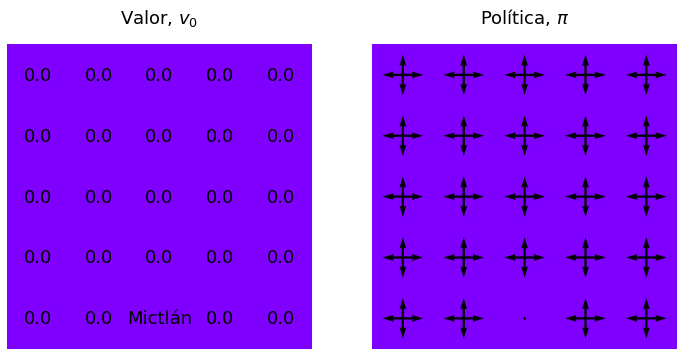

In [19]:
v = evaluar_pi(pi, num_iteraciones=0)
mostrar_entorno(v, titulo1="Valor, $v_0$")

Ahora veamos cómo se ve la función estado-valor con una iteración de la evaluación de política

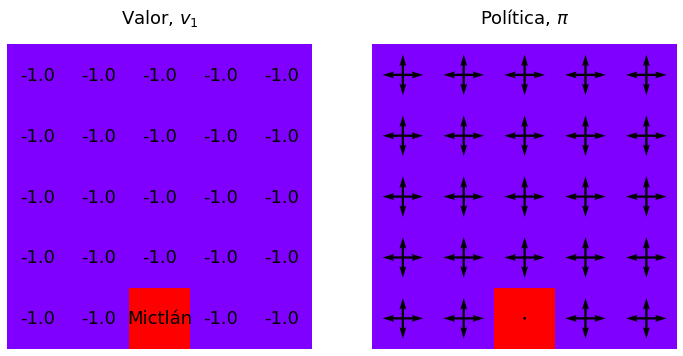

In [20]:
v = evaluar_pi(pi, num_iteraciones=1)
mostrar_entorno(v, titulo1="Valor, $v_1$")

Ahora veamos cómo se ve la función estado-valor con dos iteraciones de la evaluación de política

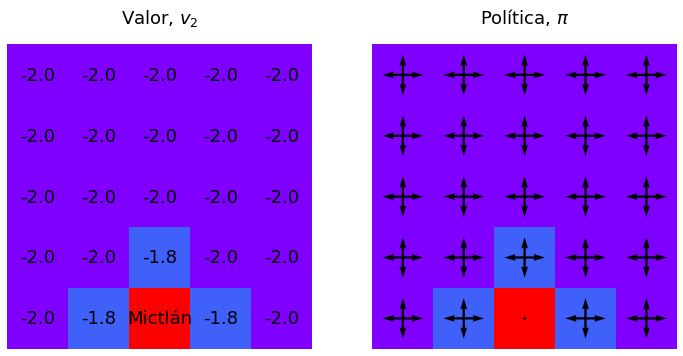

In [21]:
v = evaluar_pi(pi, num_iteraciones=2)
mostrar_entorno(v, titulo1="Valor, $v_2$")

Ahora veamos cómo se ve la función estado-valor con tres iteraciones de la evaluación de política

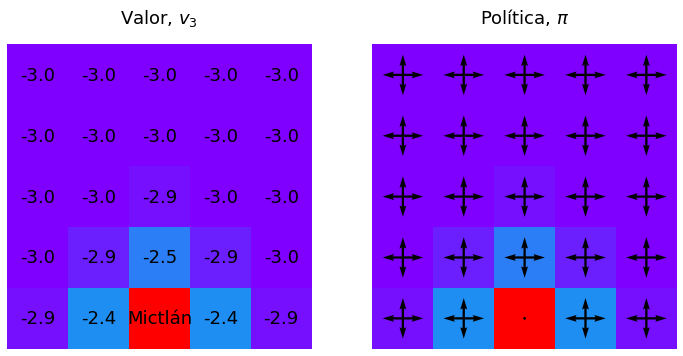

In [22]:
v = evaluar_pi(pi, num_iteraciones=3)
mostrar_entorno(v, titulo1="Valor, $v_3$")

¿Y qué hay de 10?

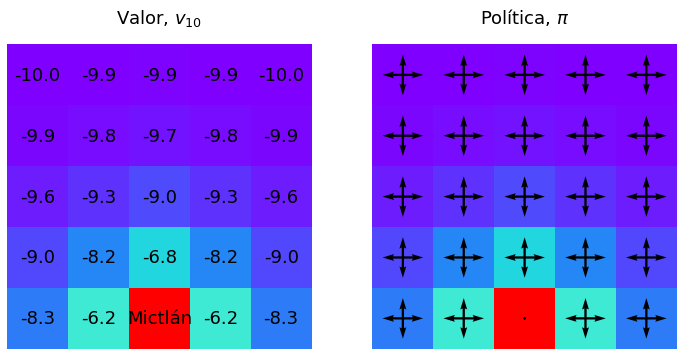

In [23]:
v = evaluar_pi(pi, num_iteraciones=10)
mostrar_entorno(v, titulo1="Valor, $v_{10}}$")

### Método de Iteración de Política
Aunque no lo hemos mencionado aún, al seguir con las evaluaciones por varias iteraciones hasta llegar a un valor con una tolerancia de cambio mínima en la función de valor, habremos realizado un paso en la iteración de política. Por favor revisa el material.

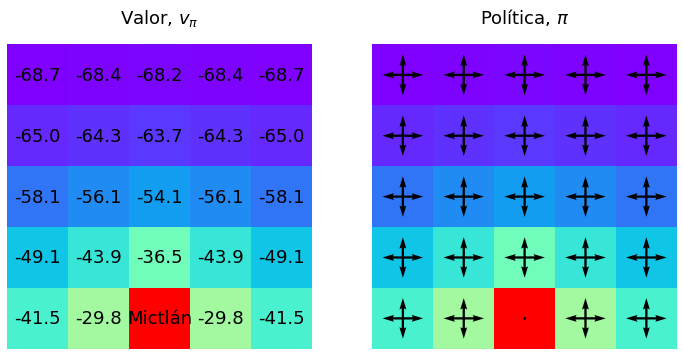

In [24]:
v = evaluar_pi(pi, num_iteraciones=1000)
mostrar_entorno(v, titulo1="Valor, $v_\\pi$")

Definimos la función para evaluar la función óptima de acción-valor o función Q

In [25]:
def evaluar_q(v, gamma=1):
    # Inicializamos los valores de la función Q
    q_pi = np.zeros((LADO_CUADRO ** 2, 4))

    # Recorremos todos los estados y determinamos q
    for s in range(LADO_CUADRO ** 2):
        for a in range(4):
            q_pi[s,a] = np.sum([
                prob_transiciones[s][a][sp] * (
                        recompensas[s][a][sp] + gamma * v[sp])
                for sp in range(LADO_CUADRO ** 2)
            ])
    return q_pi

Implementa la estrategia greedy para obtener la nueva política

In [26]:
def mejora_pi(q):
    # Inicializa los valores de la nueva política
    nueva_pi = np.zeros((LADO_CUADRO ** 2, 4))

    # Aplica la estrategia greedy con respecto a las acciones
    nueva_pi[range(LADO_CUADRO ** 2), q.argmax(axis = 1)] = 1
    return nueva_pi

Ahora sí, seguimos con el siguiente paso, el de mejora, de la política

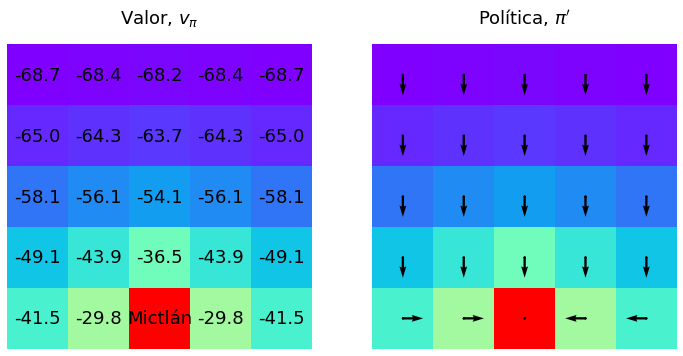

In [27]:
# Evaluamos la función acción-valor
q = evaluar_q(v)

# Obtenemos la nueva política a partir de q
pi = mejora_pi(q)

# Mostramos el entorno, especialmente para ver la nueva política
mostrar_entorno(v, pi, "Valor, $v_\\pi$", "Política, $\\pi'$")

Evaluamos ahora la nueva política para verificar la función de estado-valor

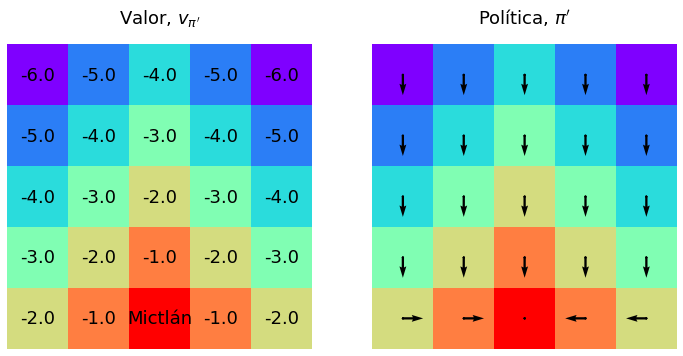

In [28]:
# Evaluamos la nueva política
v = evaluar_pi(pi, num_iteraciones=1000)
mostrar_entorno(v, pi, "Valor, $v_{\\pi'}$", "Política, $\\pi'$")

Como te puedes dar cuenta, aquí encontramos la política y función de valor óptimas para este problema.

### Método de Iteración de Valor
Continuamos con la implementación del método de iteración de valor

Volvemos a inicializar el entorno para evitar cualquier cosa. Si te fijas, ahora hemos cambiado la posición del estado terminal.

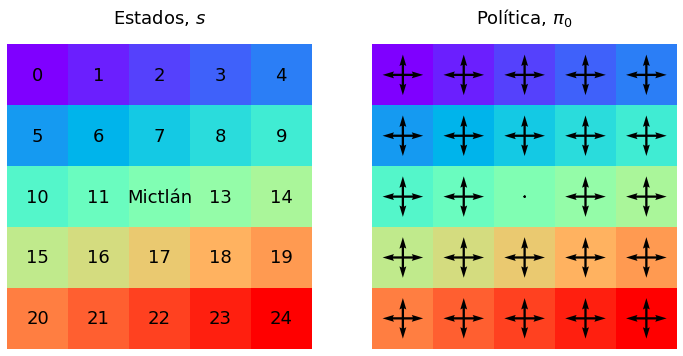

In [29]:
# Definimos la cuadrícula y el estado terminal
LADO_CUADRO = 5
CELDAS_SALIDA = [(2, 2)]

# Utilizamos la función e inicializamos el entorno
prob_transiciones, recompensas = inicializar_entorno(LADO_CUADRO, CELDAS_SALIDA)

# Definimos la política inicial
pi = 0.25 * np.ones((LADO_CUADRO ** 2, 4))

mostrar_entorno(estados, titulo1="Estados, $s$", titulo2="Política, $\\pi_0$")

Realizamos la primera iteración de valor

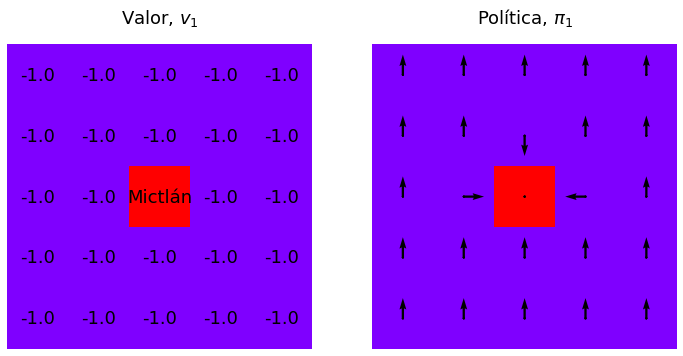

In [30]:
v = evaluar_pi(pi, num_iteraciones=1)
q = evaluar_q(v)
pi = mejora_pi(q)

mostrar_entorno(v, pi, "Valor, $v_{1}$", "Política, $\\pi_{1}$")

Aquí va la segunda iteración de valor

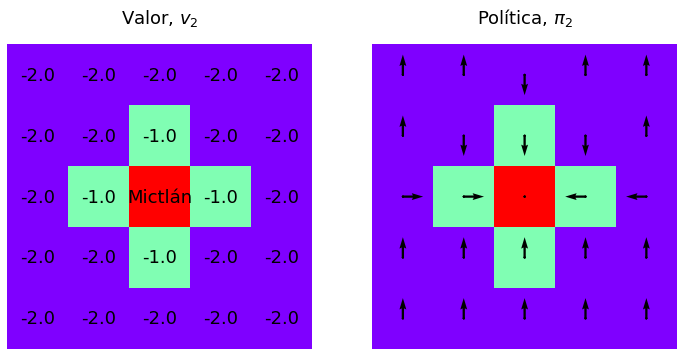

In [31]:
v = evaluar_pi(pi, num_iteraciones=1, valor=v)
q = evaluar_q(v)
pi = mejora_pi(q)

mostrar_entorno(v, pi, "Valor, $v_{2}$", "Política, $\\pi_{2}$")

La tercera...

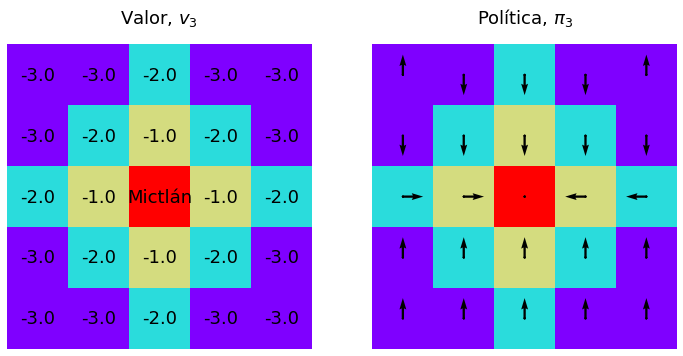

In [32]:
v = evaluar_pi(pi, num_iteraciones=1, valor=v)
q = evaluar_q(v)
pi = mejora_pi(q)

mostrar_entorno(v, pi, "Valor, $v_{3}$", "Política, $\\pi_{3}$")

Cuarta...

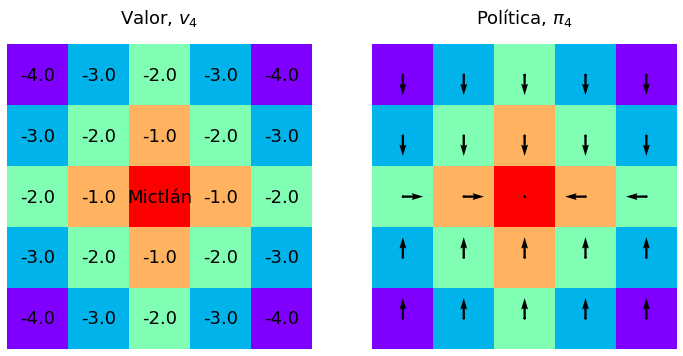

In [33]:
v = evaluar_pi(pi, num_iteraciones=1, valor=v)
q = evaluar_q(v)
pi = mejora_pi(q)

mostrar_entorno(v, pi, "Valor, $v_{4}$", "Política, $\\pi_{4}$")

Quinta iteración de valor

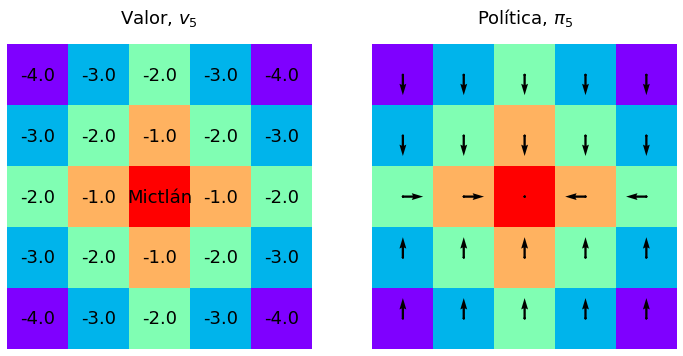

In [34]:
v = evaluar_pi(pi, num_iteraciones=1, valor=v) # value iteration !!!
q = evaluar_q(v)
pi = mejora_pi(q)

mostrar_entorno(v, pi, "Valor, $v_{5}$", "Política, $\\pi_{5}$")

 Sexta iteración de valor. ¿Realmente es necesaria?

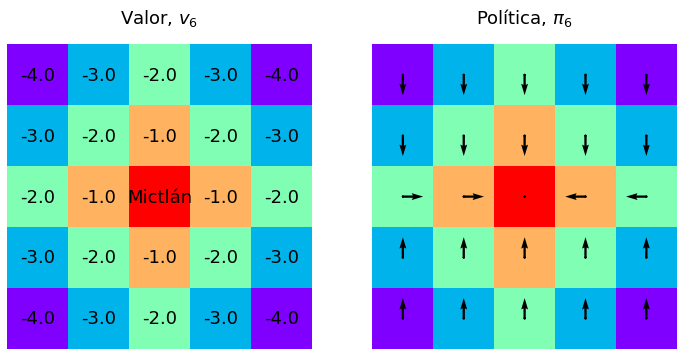

In [35]:
v = evaluar_pi(pi, num_iteraciones=1, valor=v)
q = evaluar_q(v)
pi = mejora_pi(q)

mostrar_entorno(v, pi, "Valor, $v_{6}$", "Política, $\\pi_{6}$")